# Chapter 8: Controlling Infectious Diseases

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Environment-Preparation" data-toc-modified-id="Environment-Preparation-2">Environment Preparation</a></span></li><li><span><a href="#Program-8.1:-SIR-model-with-paediatric-vaccination" data-toc-modified-id="Program-8.1:-SIR-model-with-paediatric-vaccination-3">Program 8.1: SIR model with paediatric vaccination</a></span></li><li><span><a href="#Program-8.2:-SIR-model-with-wildlife-vaccination" data-toc-modified-id="Program-8.2:-SIR-model-with-wildlife-vaccination-4">Program 8.2: SIR model with wildlife vaccination</a></span></li><li><span><a href="#Program-8.3:-SIR-model-with-pulsed-vaccination" data-toc-modified-id="Program-8.3:-SIR-model-with-pulsed-vaccination-5">Program 8.3: SIR model with pulsed vaccination</a></span></li><li><span><a href="#Program-8.4:-SIR-model-with-2-risk-classes-and-targetted-vaccination" data-toc-modified-id="Program-8.4:-SIR-model-with-2-risk-classes-and-targetted-vaccination-6">Program 8.4: SIR model with 2 risk classes and targetted vaccination</a></span></li></ul></div>

## Introduction

Chapter 8 discusses controlling infectious diseases. There are two major ways to do that contact reduction and vaccination, targeting the whole population or specific risk groups, being all year around or following a pulse.  For more details please refer back to the book (http://modelinginfectiousdiseases.org/).

## Environment Preparation

In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
from matplotlib.font_manager import FontProperties as mfp

In [2]:
pl.style.use('seaborn-whitegrid')
pl.rcParams['font.family'] = "sans-serif"

## Program 8.1: SIR model with paediatric vaccination

[[1.00769308e-01 2.44819935e-04 8.98985872e-01]
 [1.00741947e-01 2.44973409e-04 8.99013079e-01]
 [1.00714577e-01 2.45117414e-04 8.99040306e-01]
 ...
 [1.01199364e-01 7.02983117e-05 8.98730337e-01]
 [1.01197004e-01 7.03881280e-05 8.98732608e-01]
 [1.01194630e-01 7.04778218e-05 8.98734892e-01]]


Text(0.5, 0, 'Time (Years)')

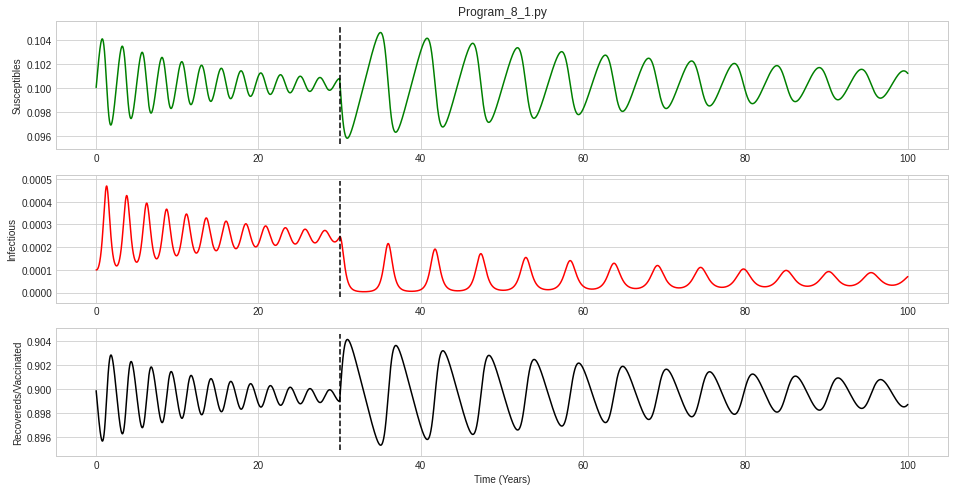

In [3]:
# Parameters
beta=520/365.0;
gamma=1/7.0;
mu=1/(70*365.0);
S0=0.1;
I0=1e-4;
p0=0.7;
tV=30*365;
ND=MaxTime=100*365;
TS=1.0
R0=1-S0-I0

INPUT = np.hstack((S0,I0,R0))

# Model Definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	Y[0]= mu*(1-p) - beta*V[0]*V[1] - mu*V[0]
	Y[1]= beta*V[0]*V[1] - gamma*V[1] - mu*V[1]
	Y[2]= mu*p + gamma*V[1] - mu*V[2]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end+t_inc, t_inc)
t_start = tV; t_end = ND; t_inc = TS
t_range2 = np.arange(tV, t_end+t_inc, t_inc)
T = np.hstack((t_range1, t_range2))
p=0
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)
p=p0
RES2 = spi.odeint(diff_eqs,RES1[-1],t_range2)

# Print Results
print (RES2)

S = np.hstack((RES1[:,0],RES2[:,0]))
I = np.hstack((RES1[:,1],RES2[:,1]))
R = np.hstack((RES1[:,2],RES2[:,2]))

# Plotting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(T[1:,]/365.0, S[1:,], '-g')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Susceptibles')
pl.title("Program_8_1.py")
pl.subplot(312)
pl.plot(T[1:,]/365.0, I[1:,], '-r')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Infectious')
pl.subplot(313)
pl.plot(T[1:,]/365.0, R[1:,], '-k')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Recovereds/Vaccinated')
pl.xlabel('Time (Years)')

## Program 8.2: SIR model with wildlife vaccination

[[1.00427638e-01 1.70076755e-03 8.97871594e-01]
 [1.00230410e-01 1.70042162e-03 8.98069168e-01]
 [1.00034164e-01 1.69961080e-03 8.98266226e-01]
 ...
 [1.00473344e-01 3.18170264e-04 8.99208485e-01]
 [1.00473300e-01 3.18173113e-04 8.99208527e-01]
 [1.00473256e-01 3.18175942e-04 8.99208568e-01]]


Text(0.5, 0, 'Time (Years)')

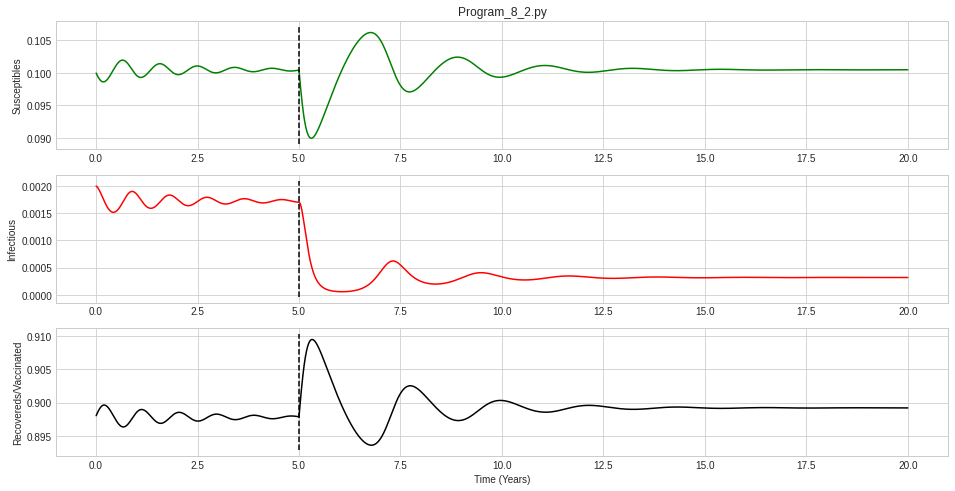

In [4]:
# Parameters
beta=520/365.0;
gamma=1/7.0;
mu=1/(10*365.0);
S0=0.1;
I0=2e-3;
v0=0.002;
tV=5*365;
ND=MaxTime=20*365;
TS=1.0
R0=1-S0-I0

INPUT = np.hstack((S0,I0,R0))

# Model Definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	Y[0]= mu - beta*V[0]*V[1] - mu*V[0] - v * V[0]
	Y[1]= beta*V[0]*V[1] - gamma*V[1] - mu*V[1]
	Y[2]= v * V[0] + gamma*V[1] - mu*V[2]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end+t_inc, t_inc)
t_start = tV; t_end = ND; t_inc = TS
t_range2 = np.arange(tV, t_end+t_inc, t_inc)
T = np.hstack((t_range1, t_range2))
v=0
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)
v=v0
RES2 = spi.odeint(diff_eqs,RES1[-1],t_range2)

# Print Results
print (RES2)

S = np.hstack((RES1[:,0],RES2[:,0]))
I = np.hstack((RES1[:,1],RES2[:,1]))
R = np.hstack((RES1[:,2],RES2[:,2]))

# Plotting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(T[1:,]/365.0, S[1:,], '-g')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Susceptibles')
pl.title("Program_8_2.py")
pl.subplot(312)
pl.plot(T[1:,]/365.0, I[1:,], '-r')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Infectious')
pl.subplot(313)
pl.plot(T[1:,]/365.0, R[1:,], '-k')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Recovereds/Vaccinated')
pl.xlabel('Time (Years)')

## Program 8.3: SIR model with pulsed vaccination

Text(0.5, 0, 'Time (Years)')

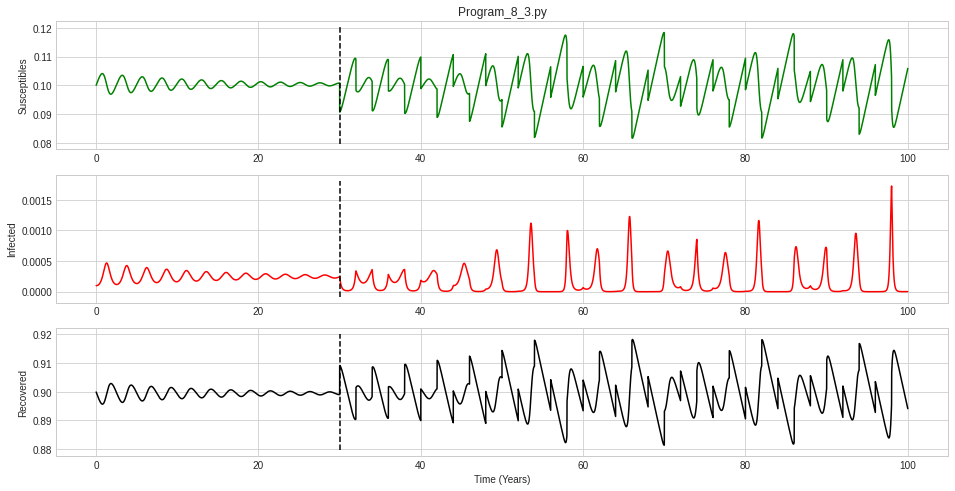

In [5]:
# Parameters
beta=520/365.0;
gamma=1/7.0;
mu=1/(70*365.0);
S0=0.1;
I0=1e-4;
p=0.1;
T=2*365;
tV=30*365;
ND=MaxTime=100*365;
TS=1.0
R0=1-S0-I0

INPUT = np.hstack((S0,I0,R0))

# Model Definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	Y[0]= mu - beta*V[0]*V[1] - mu*V[0]
	Y[1]= beta*V[0]*V[1] - gamma*V[1] - mu*V[1]
	Y[2]= gamma*V[1] - mu*V[2]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end+t_inc, t_inc)
t_start = tV; t_end = ND+TS; t_inc = TS
t_range2 = np.arange(tV, t_end, t_inc)
TT = np.hstack((t_range1, t_range2))
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)
i=0
INPUT=RES1[-1]
RES2=np.zeros((3))
while t_range2[i]<ND:
	INPUT[2]=INPUT[2]+INPUT[0]*p;
	INPUT[0]=INPUT[0]*(1-p);
	t_range3 = np.arange(t_range2[i], t_range2[i+T], t_inc)
	tc2 = spi.odeint(diff_eqs,INPUT,t_range3)
	INPUT=tc2[-1]
	RES2= np.vstack((RES2, tc2))
	i+=T
# print (len (TT))
RES2=RES2[1:,]
S = np.hstack((RES1[:,0],RES2[:,0]))
I = np.hstack((RES1[:,1],RES2[:,1]))
R = np.hstack((RES1[:,2],RES2[:,2]))
TT = np.arange(len(S))
# print (len(S))

# Plotting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(TT/365.0, S, '-g')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Susceptibles')
pl.title("Program_8_3.py")
pl.subplot(312)
pl.plot(TT/365.0, I, '-r')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Infected')
pl.subplot(313)
pl.plot(TT/365.0, R, '-k')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Recovered')
pl.xlabel('Time (Years)')

## Program 8.4: SIR model with 2 risk classes and targetted vaccination

[[1.00891832e-01 7.44034038e-01 5.34478350e-05 1.48471416e-05]
 [1.00887375e-01 7.44031332e-01 5.35076369e-05 1.48640391e-05]
 [1.00882912e-01 7.44028625e-01 5.35672660e-05 1.48809413e-05]
 ...
 [9.95598115e-02 7.26128127e-01 1.36619197e-06 3.64989680e-07]
 [9.95606971e-02 7.26127784e-01 1.36588610e-06 3.64895686e-07]
 [9.95615827e-02 7.26127441e-01 1.36558149e-06 3.64802036e-07]]


Text(0.5, 0, 'Time (Years)')

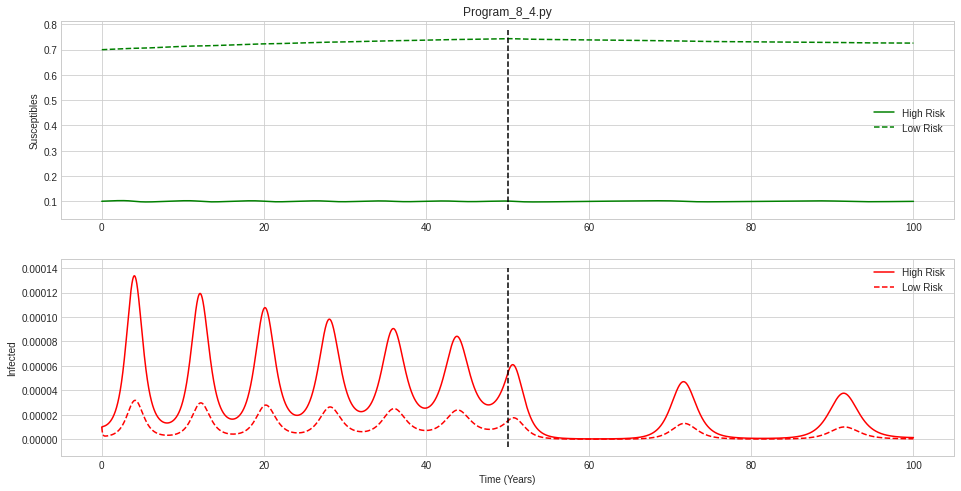

In [6]:
# Parameters
beta=np.array([[1., 0.01],[0.01 ,0.1]]);
gamma=np.array([0.1, 0.1]);
mu=np.array([0.2, 0.8])*5e-5;
p0=np.array([0.4, 0.1]);
tV=50*365;
S0=np.array([0.1, 0.7]);
I0=np.array([1e-5, 1e-5]);
ND=MaxTime=100*365;
TS=1.0

INPUT = np.hstack((S0,I0))

# Model Definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP
	MU=sum(mu)
	for i in range(2):
		Y[i]= mu[i]*(1-p[i]) - (beta[i,0]*V[2]+beta[i,1]*V[3])*V[i] - MU*V[i]
		Y[i+2]= (beta[i,0]*V[2]+beta[i,1]*V[3])*V[i] - gamma[i]*V[i+2] - MU*V[i+2]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end, t_inc)
t_start = tV; t_end = ND; t_inc = TS
t_range2 = np.arange(tV, t_end, t_inc)
T = np.hstack((t_range1, t_range2))
p=np.array([0,0])
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)
p=p0
RES2 = spi.odeint(diff_eqs,RES1[-1],t_range2)

# Print Results
print (RES2)

S1 = np.hstack((RES1[:,0],RES2[:,0]))
S2 = np.hstack((RES1[:,1],RES2[:,1]))
I1 = np.hstack((RES1[:,2],RES2[:,2]))
I2 = np.hstack((RES1[:,3],RES2[:,3]))

TT = np.arange(len(S1))

# Ploting
pl.figure(figsize=(16, 8))
pl.subplot(211)
pl.plot(TT/365.0, S1, '-g')
pl.plot(TT/365.0, S2, '--g')
pl.legend(('High Risk','Low Risk'), loc=0)
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.title("Program_8_4.py")
pl.plot(tVV, ll, '--k')
pl.ylabel('Susceptibles')
pl.subplot(212)
pl.plot(TT/365.0, I1, '-r')
pl.plot(TT/365.0, I2, '--r')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Infected')
pl.legend(('High Risk','Low Risk'), loc=0)
pl.xlabel('Time (Years)')